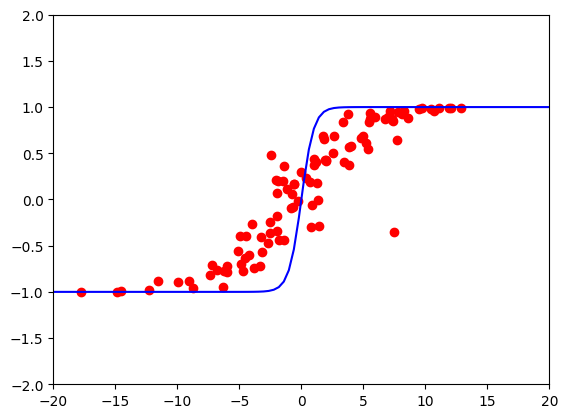

In [215]:
import random
import matplotlib.pyplot as plt
import numpy as np


def simulate_bitstream(p):
    s = 0
    total = 0
    for i in range(10000):
        # Add one to s if a random number is less than p, subtract one otherwise
        s += 1 if random.random() < p else -1
        # clamp s to -1, 1
        s = max(-1, min(1, s))
        if s > 0:
            total += 1
    return total / 10000


def compute_bitstream(p):
    s = [0, 1]
    for n in range(20):
        new_s = [0 for x in range(len(s))]
        for i in range(len(s)):
            new_s[min(len(s) - 1, max(0, i + 1))] += s[i] * p
            new_s[min(len(s) - 1, max(0, i - 1))] += s[i] * (1 - p)
        s = new_s
    return sum(s[len(s)//2:])


def probability_at_least_half(p):
    total_prob = 0
    s_prob = 0
    for i in range(10000):
        s = 0
        # Probability of this binary number occuring
        prob = 1
        # Pick a binary number
        for b in range(len(p)):
            if random.random() < p[b]:
                prob *= p[b]
                s += 1
            else:
                prob *= 1 - p[b]
                s -= 1
        if s >= 0:
            s_prob += prob
        total_prob += prob
    return s_prob / total_prob


def get_tanh(probs):
    return probability_at_least_half([p / 2 + 0.5 for p in probs]) * 2 - 1
    return probability_at_least_half([compute_bitstream(p / 2 + 0.5) for p in probs]) * 2 - 1


# Draw a tanh line
x = np.linspace(-20, 20, 100)
y = np.tanh(x)
plt.plot(x, y, color="blue")

for i in range(100):
    v = [random.random() * 2 - 1 for i in range(100)]

    plt.scatter(sum(v), get_tanh(v), color="red")

plt.xlim([-20, 20])
plt.ylim([-2, 2])
plt.show()

# # plot the bitstream for a range of p values
# x = []
# y = []
# for p in range(0, 100):
#     x.append(p / 100)
#     y.append(compute_bitstream(p / 100))
# plt.plot(x, y)
